In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [194]:
prices = pd.read_csv('data/log_prices.csv', index_col=0)
prices.index = pd.to_datetime(prices.index, format='%Y%m%d')
prices = prices.dropna()
prices['type'] = 'real'
prices.head()

,brn,cl,ho,xrb,type
date,,,,,
2015-01-05,0.010676,0.025528,-0.023495,0.032481,real
2015-01-12,-0.039646,-0.081290,-0.008362,-0.018356,real
2015-01-19,0.082589,0.041151,0.022561,0.087349,real
2015-01-26,0.117570,0.118920,0.091463,0.075879,real
2015-02-02,0.056883,0.012610,0.069970,0.039044,real


In [196]:
X = prices[['brn', 'cl', 'ho']].values
params = {
          'bandwidth': np.logspace(-1, 1, 20), 
          'algorithm': ['kd_tree', 'ball_tree'], 
          'kernel':  ['gaussian', 'tophat'],
          'breadth_first': [False, True],
          'leaf_size': np.arange(1, 20, 5)
         }
grid = GridSearchCV(KernelDensity(), params)
grid.fit(X)
grid.best_estimator_

KernelDensity(algorithm='ball_tree', atol=0, bandwidth=0.1, breadth_first=False,
              kernel='tophat', leaf_size=1, metric='euclidean',
              metric_params=None, rtol=0)

In [197]:
X = prices[['brn', 'cl', 'ho', 'xrb']].values
kde = grid.best_estimator_
kde.fit(X)
gen = kde.sample(10000)
gen_prices = pd.DataFrame(gen, columns=['brn', 'cl', 'ho', 'xrb'])
gen_prices['type'] = 'generated'

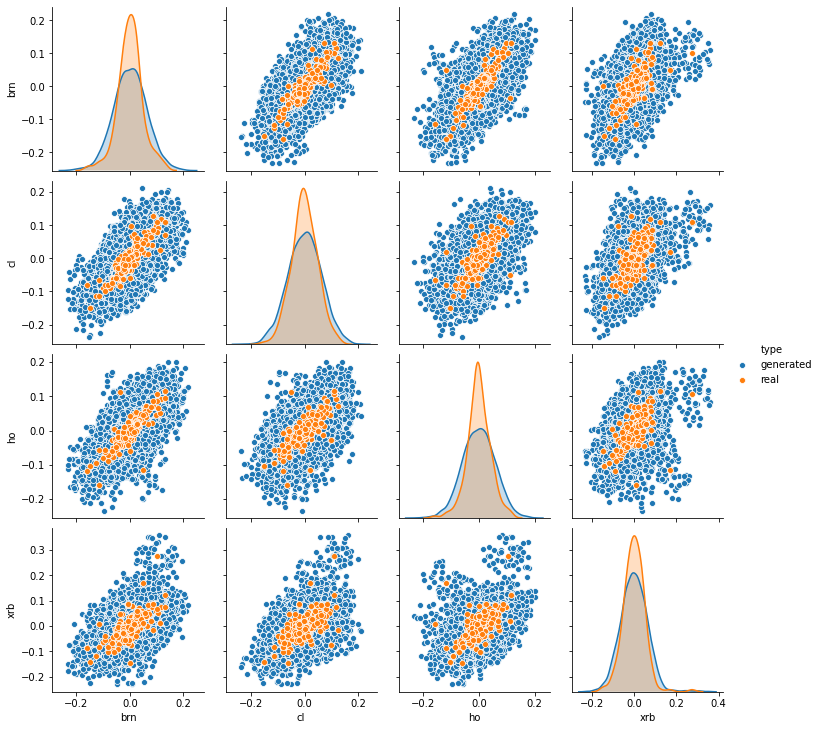

In [198]:
sn.pairplot(pd.concat([gen_prices, prices]), hue="type")
plt.show()